Projeto de predição de Hepatite c

Equipe: Daniel Lemos
        Rafael Targino
        
Data_Set: https://archive.ics.uci.edu/ml/machine-learning-databases/00503/HCV-Egy-Data.zip


Passos:
Ler os dados e normalizá-los cross-validation 10 folds
Utilizar os seguintes algoritimos:
1- KNN variando o K(1,3,5,10)
2- Naive-Bayes
3- Arvore de Decisão (Random Forrest) variando o numero de florestas
4- RLScore(variando o numero de kernels)

In [0]:
!pip install rlscore
import numpy as np
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

     |████████████████████████████████| 788kB 8.6MB/s 
  Created wheel for rlscore: filename=rlscore-0.8.1-cp36-cp36m-linux_x86_64.whl size=1824856 sha256=2a2f5814bb41f328e43e2756b2a912e5d9717751c2fcd866f505b74c3b656b46
  Stored in directory: /root/.cache/pip/wheels/96/d7/27/cd7b2182c3f5c012dbbf9a8507116b9c49140ffc733223c07b
Successfully built rlscore


Base de dados de pacientes egípcios que foram submetidos a doses de tratamento para HCV cerca de 18 meses. A discretização deve ser aplicada com base em recomendações de especialistas; há um arquivo anexado mostra como.

A base de dados reúne cerca de 

Os dados apresentão o tratamento de pacientes que apresentaram HCV e que sofreram o contágio de HCV e que passaram por tratamento, o problema é diagnosticar o grau de degradação do fígado através dos exames previamente levantados, sem a necessidade de exame de ultrasom ou histológico, ou seja prever o resultado do exame histológio acelerando assim que tipo de tratamento aplicar.
as classes são não fibroso 

In [0]:
df = pd.read_csv("https://drive.google.com/uc?authuser=0&id=1S2HnHU5zoI7ERYhVd8naSaUMt0eJZW3L&export=download")
columns = df.columns



Normalização dos Dados sem a coluna de labels, essa coluna é separada e depois é realocada junto com os dados 

In [0]:
from sklearn import preprocessing
dfclass = pd.Series(df['Baselinehistological staging'])
dfsclass = pd.DataFrame(df.iloc[:,0:28]) 
columns = dfsclass.columns

print(columns)



repcolumns = list()
for index, column in enumerate(columns):
  column = column.replace(" ","")
  repcolumns.append(column)
x = dfsclass.values
x_scale = preprocessing.scale(dfsclass)
x_normal = preprocessing.normalize(dfsclass, norm='l1')
min_max_scaler = preprocessing.MinMaxScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
x_scaled = min_max_scaler.fit_transform(dfsclass)
x_abs = max_abs_scaler.fit_transform(dfsclass)

print(x_abs)
dfnorm = pd.DataFrame(x_abs, columns = repcolumns)
print(dfnorm)



Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading'],
      dtype='object')
[[9.18032787e-01 5.00000000e-01 1.00000000e+00 ... 6.18467438e-06
  6.17030283e-06 8.12500000e-01]
 [7.54098361e-01 5.00000000e-01 8.28571429e-01 ... 4.16604614e-01
  3.83607727e-02 2.50000000e-01]
 [9.34426230e-01 5.00000000e-01 9.42857143e-01 ... 9.10316037e-01
  6.89628832e-01 2.50000000e-01]
 ...
 [6.88524590e-01 5.00000000e-01 7.42857143e-01 ... 4.25158018e-01
  1.98013656e-01 3.75000000e-01]
 [8.52459016e-01 5.00000000e-01 8.28571429e-01 ... 3.04285979e-03
  8.58997474e-01 9.37500000e-01]
 [9.01639344e-01 1.00000000e+00 7.42857143e-01 ... 6.18467438e-06
  6.17030283e-06 8.12500

692
Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading'],
      dtype='object')
692


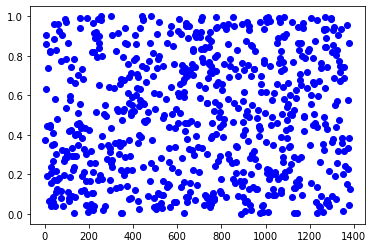

In [0]:

kf = KFold(n_splits = 2, shuffle = True, random_state = 2)
X_index = dfnorm.index
Y_index = dfclass.index

Features = next(kf.split(X_index))
Labels = next(kf.split(Y_index))

X_train = dfnorm.iloc[Features[0]]
X_test = dfnorm.iloc[Features[1]]
Y_train = dfclass.iloc[Labels[0]]
Y_test = dfclass.iloc[Labels[1]]

print(len(X_train))
print(X_train.columns)
print(len(Y_train))



pl.plot(X_train['RNA4'],'bo')


In [0]:
from rlscore.learner import RLS
from rlscore.measure import sqerror
from rlscore.learner import LeaveOneOutRLS

regparams = [2.**i for i in range(-15, 16)]
learner = RLS(X_train, Y_train, kernel="PolynomialKernel", regparam = 100, gamma=1.0, coef0=1.0, degree=2)
#Leave-one-out cross-validation predictions, this is fast due to
#computational short-cut
P_loo = learner.leave_one_out()
#Test set predictions
P_test = learner.predict(X_test)
print("leave-one-out error %f" %sqerror(Y_train, P_loo))
print("test error %f" %sqerror(Y_test, P_test))
#Sanity check, can we do better than predicting mean of training labels?



/usr/local/lib/python3.6/dist-packages/rlscore/utilities/array_tools.py:43: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(A.dtype, int) and not np.issubdtype(A.dtype, float):
/usr/local/lib/python3.6/dist-packages/rlscore/utilities/array_tools.py:43: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(A.dtype, int) and not np.issubdtype(A.dtype, float):


leave-one-out error 1.302327
test error 1.368170


In [0]:
  regparams = [2.**i for i in range(-15, 16)]
  gammas = regparams
  best_regparam = None
  best_gamma = None
  best_error = float("inf")
  best_learner = None
  for gamma in gammas:
      #New RLS is initialized for each kernel parameter
      learner = LeaveOneOutRLS(X_train, Y_train, kernel="GaussianKernel", gamma=gamma, regparams=regparams)
      e = np.min(learner.cv_performances)
      if e < best_error:
          best_error = e
          best_regparam = learner.regparam
          best_gamma = gamma
          best_learner = learner
P_test = best_learner.predict(X_test)
print("best parameters gamma %f regparam %f" %(best_gamma, best_regparam))
print("best leave-one-out error %f" %best_error)
print("test error %f" %sqerror(Y_test, P_test))

/usr/local/lib/python3.6/dist-packages/rlscore/utilities/array_tools.py:43: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(A.dtype, int) and not np.issubdtype(A.dtype, float):
/usr/local/lib/python3.6/dist-packages/rlscore/utilities/array_tools.py:43: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(A.dtype, int) and not np.issubdtype(A.dtype, float):


best parameters gamma 0.000031 regparam 1.000000
best leave-one-out error 1.259181
test error 1.257212


Naive-Bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(dfnorm,dfclass, test_size = 0.3, random_state = 900)
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)

print('Accuracy GaussianNB: {}'.format(metrics.accuracy_score(Y_test, y_pred)))

gnb = MultinomialNB()

gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)

print('Accuracy MultinominalNB: {}'.format(metrics.accuracy_score(Y_test, y_pred)))


Accuracy GaussianNB: 0.2548076923076923
Accuracy MultinominalNB: 0.27163461538461536
